# DSP Lecture Notes 2: Complex Algebra for Signal Processing
$\text{2023 D.J. Lopez | Digital Signals Processing }$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Complex and Imaginary Numbers

A quick review of imaginary numbers will tell you that the very basic expression is that it is represented by $i$. However, other textbooks may also use $j$. And the imaginary number $i$ can be derived from:
$$i = \sqrt{-1}$$

Complex numbers are part of the complex set $\mathbb{C}$. Complex numbers contain real and imaginary parts. The real number part could be any rational or irrational number while the imaginary part is composed of imaginary numbers. Say for example we have as scalars $x$, $y$, and $z$ as seen below:
$$x = 32, y = i, z = 2 + 5i$$
All of $x$, $y$, and $z$ are complex numbers. Whereas $x$ has an expanded form of $32 + 0i$ wherein we just exclude the imaginary part from writing. Scalar $y$, however, has an expanded form of $0 + i$.

In Python, we can readily express complex scalars in just a simple declaration

In [29]:
x = 32 + 0j
y = 0+ 1j
z = 2 + 5j

print(f'{x}\t{type(x)}')
print(f'{y}\t{type(y)}')
print(f'{z}\t{type(z)}')

(32+0j)	<class 'complex'>
1j	<class 'complex'>
(2+5j)	<class 'complex'>


Take note that in Python the imaginary number part is represented by $j$ instead of $i$ and should always have a numerical coefficient. We can extract the numerical coefficients of the complex scalar in Python by getting the `real` and `imag` attributes of the variable.

In [3]:
print(f'{x.real} {y.real} {z.real}')
print(f'{x.imag} {y.imag} {z.imag}')

32.0 0.0 2.0
0.0 1.0 5.0


### 1.1 Addition and Subtraction

We must always note that real and imaginary numbers cannot be added (nor subtracted) from or to one another. So when we try to do addition or subtraction with complex numbers we need to align the operation respective of the real and imaginary parts. Let's operate with the following complex scalars:
$$a = 2 + 3i, b = 5-i$$

In [30]:
a = 1 + 3j
b = 2 - 1j

print(a + b)
print(b - a)

(3+2j)
(1-4j)


### 1.2 Multiplication of Complex Numbers

Unlike element-wise vectors, multiplication and division of complex numbers are not straightforward. Multiplication treats a complex scalar as a binomial algebraic expression. So if we consider the equation:
$$v = a \cdot b = (1 + 3i)\cdot(2 - i)$$
$$v = 1\cdot2 + 3i \cdot 2 + 1\cdot(-i) - 3i\cdot i = 2 + 6i-i - 3(-1)$$
$$v = 2 -5i +3 = 5 + 5i$$

We can then verify this in code:

In [23]:
a*b

(5+5j)

### 1.3 Division

Division of complex numbers requires knowledge of the *conjugate* of complex numbers. The conjugate of a complex number is simply the same complex expression wherein the imaginary part is multiplied to $-1$. For example, given the complex scalar $c = 4+3i$, its complex conjugate $c^*$ will be $4-3i$.


To divide two complex scalars $a$ and $b$, we can express them as a fraction $\frac{a}{b}$. We then need to multiply the numerator and the denominator by the complex conjugate of the denominator ($b^*$). We can see this as:
$$a/b = \frac{a}{b} = \frac{a}{b} \cdot \frac{b^*}{b^*} = \frac{a\cdot b^*}{b \cdot b^*}$$

So given our actual values:
$$v = \frac{1+3i}{2-i} = \frac{1+3i}{2-i}\cdot \frac{2+i}{2+i} = \frac{(1+3i)(2+i)}{(2-i)(2+i)} = \frac{2+7i+3(-1)}{4-(-1)}$$
$$v = \frac{-1+7i}{5} = -\frac{1}{5}(1-7i) = -\frac{1}{5} - (-\frac{7i}{5}) = -0.2 + 1.4i$$

We can then see this in code as:

In [25]:
a/b

(-0.2+1.4j)

To prove the division solution we just stated let's manually implement the procedure:

In [28]:
b_conj = b.conjugate()
b_conj

(2+1j)

In [30]:
num = a*b_conj
den = b*b_conj

print(num)
print(den)

(-1+7j)
(5+0j)


In [31]:
v = num/den
print(v)

(-0.2+1.4j)


### 1.4. Power of Imaginary Numbers

We recall in Eq. 2.1 that the identiy of $i$ is $\sqrt{-1}$. We can infer from this that if we square $\sqrt{-1}$ we would just get $-1$. Consequently, this also means that $i^2$ is $-1$. The powers of imaginary numbers rotate on the following fundamental identities:

| Expression | Identity | 
| --- | --- |
| $i^0$ | $1$ |
| $i^1$ | $i =\sqrt{-1}$ |
| $i^2$ | $-1$ |
| $i^3$ | $-i$ |
| $i^4$ | $1$ |

## 2. Visualizing Complex Numbers

It is possible to visualize complex numbers even though we have a notion of the "imaginary" number space. Complex numbers can be intuitively plotted on a Cartesian plane where we have the real number part on the x-axis and the imaginary number on the y-axis. 

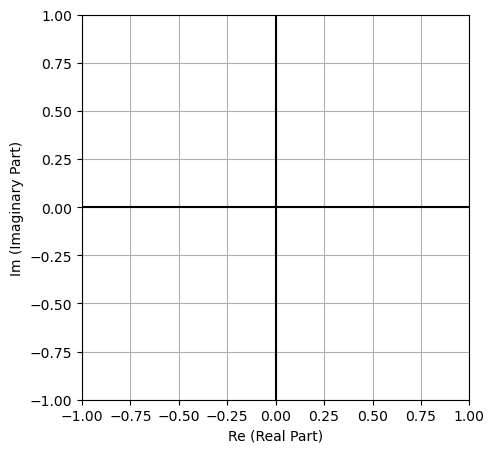

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlabel('Re (Real Part)')
ax.set_ylabel('Im (Imaginary Part)')

ax.set_xlim((-1,1))
ax.set_ylim((-1,1))

ax.axhline(color='k')
ax.axvline(color='k')
ax.grid()

We can try to plot the complex scalars $a = 1+3i$ and $b = 2 - i$

In [67]:
def plot_complex(cnumber):
    fig, ax = plt.subplots(figsize=(5,5))

    x,y = cnumber.real, cnumber.imag

    ax.set_title(rf'${x} + {y}i$')
    
    ax.set_xlabel('Re (Real Part)')
    ax.set_ylabel('Im (Imaginary Part)')
    
    ax.set_xlim((-5,5))
    ax.set_ylim((-5,5))
    
    ax.axhline(color='k')
    ax.axvline(color='k')

    if y > 0:
        ax.vlines(x, 0, y, 'gray', ':')
        
    else:
        ax.vlines(x, y, 0, 'gray', ':')

    if x > 0:
        ax.hlines(y, 0, x, 'gray', ':')
    else:
        ax.hlines(y, x, 0, 'gray', ':')
    
    ax.text(x,y/2,f'({y})')
    ax.text(x/2-0.3,y-0.3,f'({x})')
    ax.plot(x, y, 'o')
    
    ax.grid()

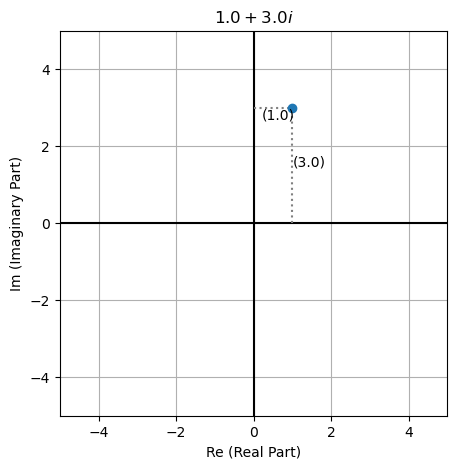

In [69]:
plot_complex(a)

## 3. Magnitude and Phases
A similar concept between vectors and complex numbers is the concept of magnitude and phase. For brevity, the magnitude of a complex number is represented as $\mathbf{M}$ while the phase is represented by $\phi$. 

### 3.1 Magnitude

The magnitude of a complex number is similar to the concept of the magnitude or norm of a vector. The magnitude of a complex number can be computed in many ways. In most engineering textbooks, the magnitude of a complex number can be computed by just getting the coefficient of the real number component. But a more general way of computing the magnitude is by applying the Pythagorean theorem (Euclidean Distance) to the real and imaginary number parts of the complex scalar. We can then derive this as:

$$\mathbf{M_{a}} = |1+3i| = \sqrt{1^2+3^2} = \sqrt{10}$$

In [34]:
mag_a = np.sqrt(a.real**2 + a.imag**2)
mag_a

3.1622776601683795

However, when the parameter of the built-in function `abs()` is a `complex` type it automatically computes for its magnitude:  

In [36]:
abs(a)

3.1622776601683795

### 3.2 Phase

The phase of the complex number is the angle between the real number and the imaginary number part. A more formal term for the phase or angle of the complex scalar is its argument $\arg{a}$. We can compute the phase of a complex scalar as:
$$\angle{a} = \arg{a} = \arctan(\frac{a_{imag}}{a_{real}})$$

We can then perform this in code:

In [46]:
np.arctan(a.imag/a.real)

1.2490457723982544

In [47]:
np.angle(a)

1.2490457723982544

However, the answer we got is in radians we can easily convert this using `np.rad2deg()`.

In [48]:
phi_a = np.angle(a)
np.rad2deg(phi_a)

71.56505117707799